In [46]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of commonfunctions failed: Traceback (most recent call last):
  File "C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "C:\Users\ahmed\anaconda3\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\ahmed\anaconda3\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "p:\image-processing-notes\07_segmentation\commonfunctions.py", line 17, in <module>
    from skimage.filters import threshold_adaptive
ImportError: cannot import n

## Change specific color in an image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


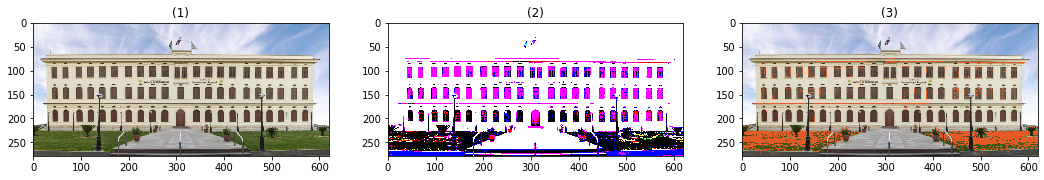

In [47]:
# 1- Get the required RGB color
source_color = (90.0, 111.0, 52.0)
target_color = (230.0, 90.0, 40.0)

# 2- Read image
img = io.imread('./images/cufe.png')

# 3- calculate differences between the image and the required pixel value
diff_mat = img - source_color

# 4- calculate overall distance from the given RGB color 
distance = np.linalg.norm(diff_mat, axis=2)

# 5- create a mask by thresholding the differences
threshold = 33.5
edited_img = np.copy(img)
edited_img[distance < threshold] = target_color

# 6- show the image
show_images([img, diff_mat, edited_img])

## Adaptive thresholding

In [48]:
def get_threshold(image):
    
    img_hist = np.array(
        histogram(image, nbins=256, source_range='dtype')
        )
    
    init_threshold = 0
    
    for i in range(img_hist.shape[1]):
        init_threshold += i * img_hist[0, i]
    
    init_threshold /= (image.shape[0] * image.shape[1])
    
    lower_img_mean = np.mean(image [image < init_threshold])
    upper_img_mean = np.mean(image[image > init_threshold])
    
    threshold = (lower_img_mean + upper_img_mean) / 2
    
    return threshold
    

In [49]:
def apply_threshold(image, threshold):
    binary_img = np.ones(image.shape) * 255
    binary_img[image > threshold] = 0
    return binary_img 

In [50]:
def apply_adaptive_thresholding(img):
    threshold = get_threshold(img)
    binary_img = apply_threshold(img, threshold)
    return binary_img

In [51]:
def read_grayscale_img(path):
    img = io.imread(path, as_gray=True).astype(np.uint8) * 255
    return img

C:\Users\ahmed\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\ahmed\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\ahmed\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


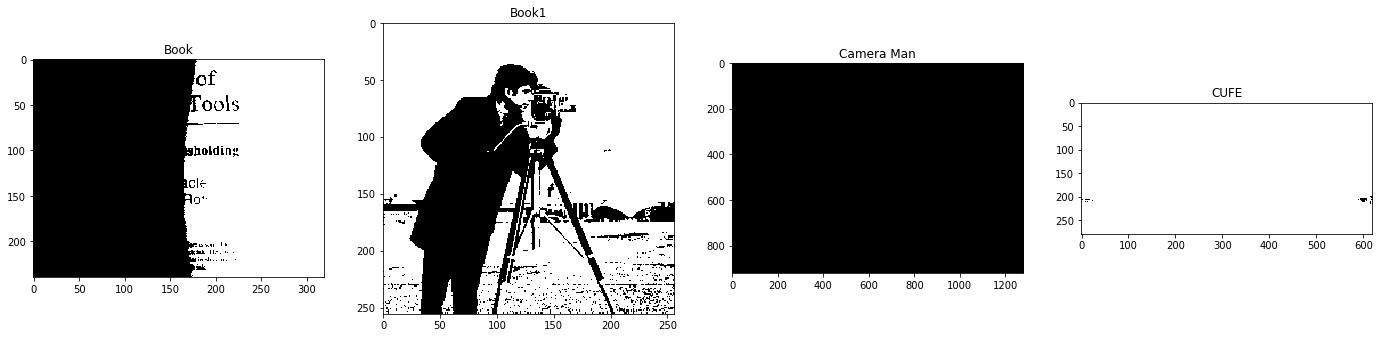

In [52]:
book_img = read_grayscale_img("./images/book.png")
cameraman_img = read_grayscale_img("./images/cameraman.png")
book1_img = read_grayscale_img("./images/book1.png")
cufe_img = read_grayscale_img("./images/cufe.png")

book_binary_img = apply_adaptive_thresholding(book_img)
cameraman_binary_img = apply_adaptive_thresholding(cameraman_img)
book1_binary_img = apply_adaptive_thresholding(book1_img)
cufe_binary_img = apply_adaptive_thresholding(cufe_img)

show_images([book_binary_img, cameraman_binary_img, book1_binary_img, cufe_binary_img ],
            ['Book', 'Book1', 'Camera Man', 'CUFE'])



## Local adaptive thresholding

In [53]:
def apply_local_adaptive_thresholding(img):
    y_mid = img.shape[0] // 2
    x_mid = img.shape[1] // 2
    
    binary_img = np.zeros(img.shape)
    
    binary_img[0: y_mid, 0: x_mid] = apply_adaptive_thresholding(img[0: y_mid, 0: x_mid])
    binary_img[y_mid:, 0: x_mid] = apply_adaptive_thresholding(img[y_mid:, 0: x_mid])
    binary_img[0: y_mid, x_mid:] = apply_adaptive_thresholding(img[0: y_mid, x_mid:])
    binary_img[y_mid:, x_mid:] = apply_adaptive_thresholding(img[y_mid:, x_mid:])
    
    return binary_img
    

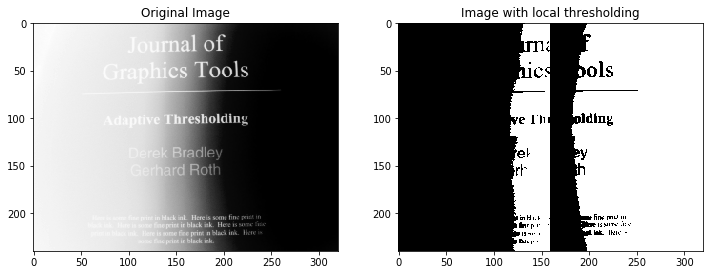

In [54]:
book_img = read_grayscale_img("./images/book.png")
book_binary_img = apply_local_adaptive_thresholding(book_img)
show_images([book_img, book_binary_img], ['Original Image', 'Image with local thresholding'])